<a href="https://colab.research.google.com/github/eruru0411/git-test/blob/master/SemiProject_HR_ipynb_%E3%81%AE%E3%82%B3%E3%83%94%E3%83%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas  as pd
import numpy   as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy            import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics  import confusion_matrix, accuracy_score, f1_score, roc_auc_score,\
                             precision_score,recall_score, roc_curve, classification_report,precision_recall_curve
from sklearn                 import preprocessing
# from sklearn.preprocessing   import StandardScaler,RobustScaler,MinMaxScaler, Binarizer, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, GridSearchCV, KFold
import warnings
warnings.filterwarnings(action="ignore")
barline = "\n============================================"
e = "\n"

In [ ]:
train_df = pd.read_csv("train.csv")
train_df.shape

(54808, 14)

In [ ]:
# df.info()

In [ ]:
test_df = pd.read_csv("test.csv")
# test_df.info()

In [ ]:
df = train_df.append(test_df)

In [ ]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0.0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0.0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0.0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0.0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0.0


In [ ]:
df.tail()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
23485,53478,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61,NaN
23486,25600,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74,NaN
23487,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50,NaN
23488,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,NaN,1,0,0,70,NaN
23489,5973,Technology,region_17,Master's & above,m,other,3,40,5.0,5,1,0,89,NaN


In [ ]:
df["education"].value_counts() # 머신러닝으로 채워넣기(bike 참조)

Bachelor's          52247
Master's & above    21429
Below Secondary      1179
Name: education, dtype: int64

In [ ]:
df["recruitment_channel"].value_counts() #0~2 범주화 시키기 0:인력소싱업체 1:추천? 2:기타

other       43524
sourcing    33181
referred     1593
Name: recruitment_channel, dtype: int64

In [ ]:
df["department"].value_counts() #범주화 시키기 

Sales & Marketing    24155
Operations           16112
Procurement          10158
Technology           10149
Analytics             7671
Finance               3627
HR                    3503
Legal                 1484
R&D                   1439
Name: department, dtype: int64

In [ ]:
#df["region"].value_counts()  -> 나중에...

In [ ]:
df.isnull().sum()

employee_id                 0
department                  0
region                      0
education                3443
gender                      0
recruitment_channel         0
no_of_trainings             0
age                         0
previous_year_rating     5936
length_of_service           0
KPIs_met >80%               0
awards_won?                 0
avg_training_score          0
is_promoted             23490
dtype: int64

In [ ]:
# import missingno as msno
# msno.bar(df)

In [ ]:
df.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,78298.000000,78298.000000,78298.000000,72362.000000,78298.000000,78298.000000,78298.000000,78298.000000,54808.000000
mean,39149.500000,1.253378,34.797619,3.332219,5.848974,0.354032,0.023053,63.349664,0.085170
std,22602.830026,0.606766,7.665928,1.260982,4.248070,0.478222,0.150073,13.383664,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19575.250000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39149.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58723.750000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [ ]:
# sub = pd.read_csv("sample_submission.csv")
# sub

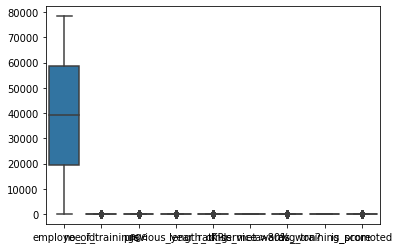

In [ ]:
sns.boxplot(data=df)

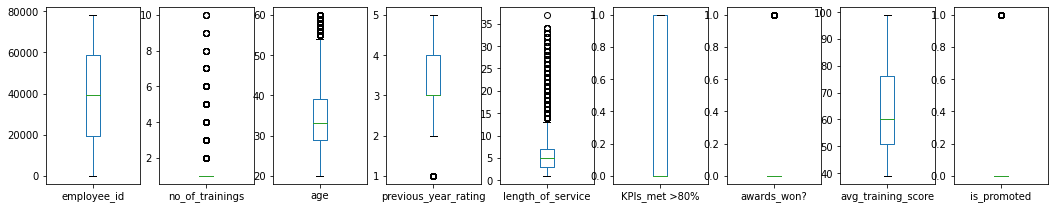

In [ ]:
df.plot(kind='box', subplots=True, figsize=(20, 15), layout=(4,10), sharex=False, sharey=False)
plt.show()

In [ ]:
df1 = df.drop("employee_id", axis=1)
# previous_year_rating: length_of_service가 1인 사람(새로운 직원)인 경우 전년도 평가 지표가 없음
df1["previous_year_rating"] = df1["previous_year_rating"].fillna(0)

# 나이: 20~60 구간? 5년..? 20~25, 26~30, 31~35, 36~40, 41~50, 50up
df1["age"].value_counts().sort_index()

def age_drop(age):
  if   age <= 25: cate = 0
  elif age <= 30: cate = 1
  elif age <= 35: cate = 2
  elif age <= 40: cate = 3
  elif age <= 50: cate = 4
  else:           cate = 5
  return cate

df1["age_cate"] = df1["age"].apply(lambda x: age_drop(x))

df1["age_cate"].value_counts()

# 지역 - region 34개


2    22949
1    21608
3    14172
4    11131
0     4338
5     4100
Name: age_cate, dtype: int64

In [ ]:
# length_of_service: 1, 2~4, 5~7, 8~10, 11~20, 21up
df1["length_of_service"].value_counts().sort_index()

def los_drop(year):
  if   year ==  1: cate = 0   # 신입
  elif year <=  4: cate = 1
  elif year <=  7: cate = 2
  elif year <= 10: cate = 3
  elif year <= 20: cate = 4
  else:            cate = 5   # 20년 넘게 근속
  return cate

df1["workyear"] = df1["length_of_service"].apply(lambda x: los_drop(x))

df1["workyear"].value_counts()

1    29367
2    23091
3    10979
4     7606
0     6539
5      716
Name: workyear, dtype: int64

In [ ]:
df1["gender"] = df1["gender"].apply(lambda x: 0 if x == "f" else 1)

df1["edu"]  = df1["education"].map({"Below Secondary": 0, "Bachelor's": 1, "Master's & above": 2})
df1["ch"]   = df1["recruitment_channel"].map({"other": 0, "sourcing": 1, "referred": 2})

df1.drop("education", axis=1, inplace=True)
df1.drop("recruitment_channel", axis=1, inplace=True)
df1.drop("age", axis=1, inplace=True)
df1.drop("length_of_service", axis=1, inplace=True)

df1.rename(columns={df1.columns[3]: 'train_no',
                    df1.columns[4]: 'last_rate',
                    df1.columns[5]: 'KPI80',
                    df1.columns[6]: 'awards',
                    df1.columns[7]: 'avg_score'}, inplace=True)


df1.head()

,department,region,gender,train_no,last_rate,KPI80,awards,avg_score,is_promoted,age_cate,workyear,edu,ch
0,Sales & Marketing,region_7,0,1,5.0,1,0,49,0.0,2,3,2.0,1
1,Operations,region_22,1,1,5.0,0,0,60,0.0,1,1,1.0,0
2,Sales & Marketing,region_19,1,1,3.0,0,0,50,0.0,2,2,1.0,1
3,Sales & Marketing,region_23,1,2,1.0,0,0,50,0.0,3,3,1.0,0
4,Technology,region_26,1,1,3.0,0,0,73,0.0,4,1,1.0,0


In [ ]:
df1.shape

(78298, 13)

In [ ]:
X_train = df1.iloc[:54808, :].drop("is_promoted", axis=1)  # 학습용 문제
y_train = df1.iloc[:54808, :]["is_promoted"]               # 학습용 답안
X_test  = df1.iloc[54808:, :].drop("is_promoted", axis=1)  # 시험용 문제
# y_test  = None                                     # 제출!

# X_train[:2]
# y_train[:2]
X_test[:2]

,department,region,gender,train_no,last_rate,KPI80,awards,avg_score,age_cate,workyear,edu,ch
0,Technology,region_26,1,1,0.0,1,0,77,0,0,1.0,1
1,HR,region_4,0,1,3.0,0,0,51,2,2,1.0,0


In [ ]:
# rate_df = pd.DataFrame();
# rate_df["SER0"] = df["department"][df["is_promoted"]==0].value_counts()
# rate_df["SER1"] = df["department"][df["is_promoted"]==1].value_counts()
# rate_df["SER0_RATE"] = rate_df["SER0"]  / (rate_df["SER0"] + rate_df["SER1"])      # df["is_promoted"].count()
# rate_df["SER1_RATE"] = rate_df["SER1"]  / (rate_df["SER0"] + rate_df["SER1"]) * 100
# print(rate_df)

def rateCheck(df, col=""):
  rate_df = pd.DataFrame()
  rate_df["count0"] = df[col][df["is_promoted"]==0].value_counts()
  rate_df["count1"] = df[col][df["is_promoted"]==1].value_counts()
  rate_df["rate0"] = rate_df["count0"]  / (rate_df["count0"] + rate_df["count1"]) * 100     # df["is_promoted"].count()
  rate_df["rate1"] = rate_df["count1"]  / (rate_df["count0"] + rate_df["count1"]) * 100
  print(rate_df)

# rateCheck(df1, "region")

In [ ]:
# Dataframe 확인 ---------------------------------------
def MyCheckDataframe(df, target="target") :
    print("Check Dataframe ----------------------------")
    print("Shape :", e, df.shape)
    print("Info  :", e, df.info())
    print("Head  :", e, df.head())
    print("Count :", e, df[target].value_counts())

    y = df[target]
    X = df.drop(target, axis=1)
    print("Target Shape :", e, X.shape, y.shape, barline)
    return X, y

In [ ]:
# plt.figure(figsize=(12,8))
# sns.countplot(df1['region'],hue=df1['is_promoted'],palette='Set1')
# plt.xticks(rotation=90)
# plt.show()

# df1["region"]
# df1["is_promoted"]

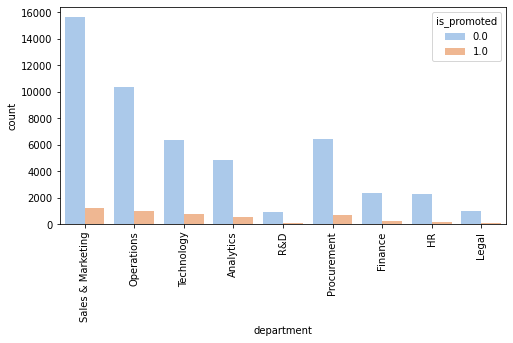

In [ ]:
plt.figure(figsize=(8, 4))
# sns.countplot(df1['gender'], hue=df1['is_promoted'],palette='pastel')
sns.countplot(df1['department'], hue=df1['is_promoted'],palette='pastel')
plt.xticks(rotation=90)
plt.show()

In [ ]:
df1["gender"].value_counts()

1    55092
0    23206
Name: gender, dtype: int64

In [ ]:
MyCheckDataframe(df1, "is_promoted")

Check Dataframe ----------------------------
Shape : 
 (78298, 13)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 78298 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   department   78298 non-null  object 
 1   region       78298 non-null  object 
 2   gender       78298 non-null  int64  
 3   train_no     78298 non-null  int64  
 4   last_rate    78298 non-null  float64
 5   KPI80        78298 non-null  int64  
 6   awards       78298 non-null  int64  
 7   avg_score    78298 non-null  int64  
 8   is_promoted  54808 non-null  float64
 9   age_cate     78298 non-null  int64  
 10  workyear     78298 non-null  int64  
 11  edu          74855 non-null  float64
 12  ch           78298 non-null  int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 10.9+ MB
Info  : 
 None
Head  : 
           department     region  gender  train_no  ...  age_cate  workyear  edu  ch
0  Sales & Marketing  

(              department     region  gender  ...  workyear  edu  ch
 0      Sales & Marketing   region_7       0  ...         3  2.0   1
 1             Operations  region_22       1  ...         1  1.0   0
 2      Sales & Marketing  region_19       1  ...         2  1.0   1
 3      Sales & Marketing  region_23       1  ...         3  1.0   0
 4             Technology  region_26       1  ...         1  1.0   0
 ...                  ...        ...     ...  ...       ...  ...  ..
 23485              Legal   region_2       1  ...         0  0.0   1
 23486         Technology  region_25       1  ...         2  1.0   1
 23487                 HR  region_16       0  ...         1  1.0   1
 23488        Procurement  region_31       1  ...         0  1.0   1
 23489         Technology  region_17       1  ...         2  2.0   0
 
 [78298 rows x 12 columns], 0        0.0
 1        0.0
 2        0.0
 3        0.0
 4        0.0
         ... 
 23485    NaN
 23486    NaN
 23487    NaN
 23488    NaN
 23

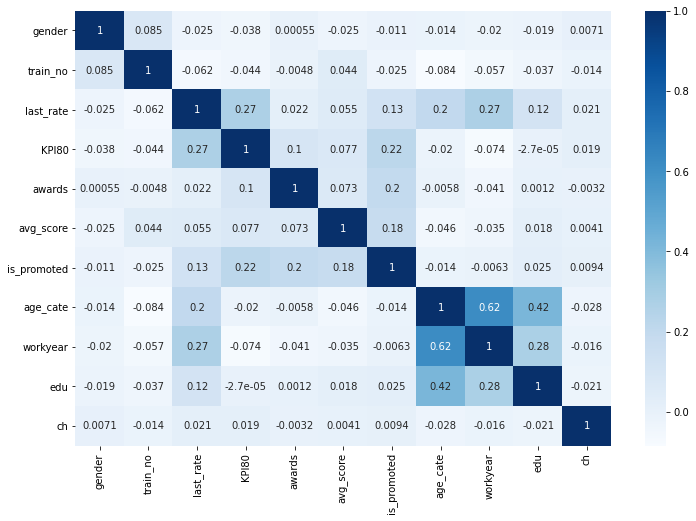

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df1.corr(), annot=True, fmt=".2g", cmap="Blues")

In [ ]:
# Dataframe 확인 ---------------------------------------
def MyCheckDataframe(df, target="target") :
    print("Check Dataframe ----------------------------")
    print("Shape :", e, df.shape)
    print("Info  :", e, df.info())
    print("Head  :", e, df.head())
    print("Count :", e, df[target].value_counts())

    y = df[target]
    X = df.drop(target, axis=1)
    print("Target Shape :", e, X.shape, y.shape, barline)
    return X, y

In [ ]:
def MyScores(y_test, pred, proba, str=None) :
    print("Scores : {} ---------" .format(str))
    acc       = accuracy_score(y_test, pred)
    f1        = f1_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall    = recall_score(y_test, pred)
    auc       = roc_auc_score(y_test, proba[:, 1].reshape(-1, 1))
    print("정확도{:.4f}  F1 {:.4f}=(정밀도{:.4f} 재현률{:.4f}) auc {:.4f}" .format(acc, f1, precision, recall, auc))
    cf_matrix = confusion_matrix(y_test, pred)
    print("Confusion Matrix", e, cf_matrix, barline)

In [ ]:
def MySplitFitPredict(model, X, y, str=None, rate=0.2, prc=False, roc=False) :
    # X_train ,X_test , y_train, y_test = train_test_split(X, y, test_size=rate, random_state=121)
    model.fit(X_train, y_train)
    pred  = model.predict(X_test)
    proba = model.predict_proba(X_test)

    MyScores(y_test, pred, proba, str)

    if prc == True:
        MyChartPrcRclCurve(y_test, proba)
    if roc == True:
        MyChartRocCurve(y_test, proba)
    return proba # X_train, X_test, y_train, y_test, proba # , pred, proba

In [ ]:
rf_model = RandomForestClassifier()
MySplitFitPredict(rf_model, X, y, "최초 점수", )

NameError: ignored

In [ ]:
# plt.figure(figsize=(12,8))
# sns.countplot(df1['education'],hue=df1['is_promoted'],palette='Set3')
# plt.show()

In [ ]:
# plt.figure(figsize=(12,8))
# sns.countplot(df1['recruitment_channel'],hue=df1['is_promoted'],palette='YlOrRd_r')
# plt.xticks(rotation=90)
# plt.show()

In [ ]:
# plt.figure(figsize=(12,8))
# sns.countplot(df1['avg_training_score'],hue=df1['is_promoted'],palette='pastel')
# plt.xticks(rotation=90)
# plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

items = df1["department"]

label = LabelEncoder()
label.fit(items)
labels = label.transform(items)
print(labels)
print('classes:', label.classes_, '\n')
#레이블 인코딩은 간단하게 문자열 값을 숫자형 카테고리 값으로 변환한다. 그러나 일괄적인 숫자값으로의 변환이 예측성능을 떨어트리는 원인이 될 수 있다. 
#이는 할당받은 카테고리 별 숫자 값의 크고 작음에 대한 특성이 작용하기 때문이다.
#레이블 인코딩은 선형회귀와 같은 ML 알고리즘에서는 적용하지 않아야한다.  -> ? ㅜㅜ